In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
import parameters

In [2]:
exp1_hitmiss = parameters.experiment1_hitmiss_csvout_dir
exp1_facr = parameters.experiment1_facr_csvout_dir

exp2_hitmiss = parameters.experiment2_hitmiss_csvout_dir
exp2_facr = parameters.experiment2_facr_csvout_dir

exp3_hitmiss = parameters.experiment3_hitmiss_csvout_dir
exp3_facr = parameters.experiment3_facr_csvout_dir

exp4_hitmiss = parameters.experiment4_hitmiss_csvout_dir
exp4_facr = parameters.experiment4_facr_csvout_dir

# show experiment 1

In [3]:
def Exp(path):
    file_list = os.listdir(path)
    mean_acc_list = []
    for file in file_list:
        df = pd.read_csv(os.path.join(path, file), dtype=np.float32)
        mean_last100 = np.max(df['test acc'].values[-100:])
        mean_acc_list.append(mean_last100)
    return mean_acc_list

In [4]:
exp1_hitmiss_list = Exp(exp1_hitmiss)
exp1_facr_list = Exp(exp1_facr)

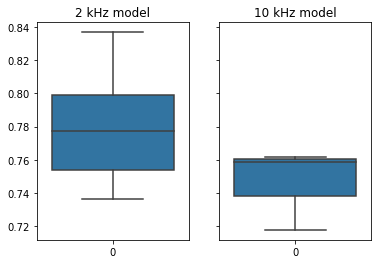

In [5]:
# facr model learning from control group data(0.8) and test in control group data(0.2)
fg, (ax1, ax2) = plt.subplots(1,2, sharey=True)
sns.boxplot(data=exp1_facr_list, ax=ax1)
ax1.title.set_text('2 kHz model')
# hitmiss model learning from control group data(0.8) and test in control group data(0.2)
sns.boxplot(data=exp1_hitmiss_list, ax=ax2)
ax2.title.set_text('10 kHz model')

# show experiment 2

Text(0.5, 1.0, '10 kHz model')

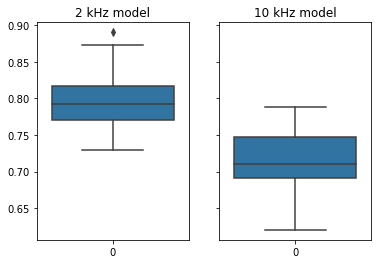

In [6]:
exp2_hitmiss_list = Exp(exp2_hitmiss)
exp2_facr_list = Exp(exp2_facr)
fg, (ax3, ax4) = plt.subplots(1,2, sharey=True)
# facr model learning from other objects except object A, test in object A
sns.boxplot(data=exp2_facr_list, ax=ax3)
ax3.set_title('2 kHz model')
# hitmiss model learning from other objects except object A, test in object A
sns.boxplot(data=exp2_hitmiss_list, ax=ax4)
ax4.set_title('10 kHz model')

# show experiment 3

Text(0.5, 1.0, '10 kHz model')

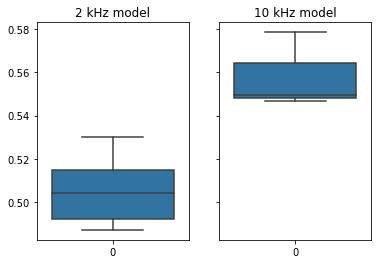

In [7]:
exp3_hitmiss_list = Exp(exp3_hitmiss)
exp3_facr_list = Exp(exp3_facr)
fg, (ax5, ax6) = plt.subplots(1,2, sharey=True)
# facr model learning from control group, and test in Exp group with CNO injection.
sns.boxplot(data=exp3_facr_list, ax=ax5)
ax5.set_title('2 kHz model')
# hitmiss model learning from control group, and test in Exp group with CNO injection.
sns.boxplot(data=exp3_hitmiss_list, ax=ax6)
ax6.set_title('10 kHz model')

# shoe experiment 1,2 and 3

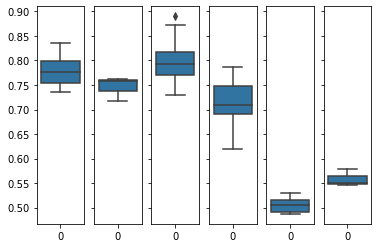

In [8]:
fg, axs = plt.subplots(1,6, sharey=True)
data_list = [exp1_facr_list, exp1_hitmiss_list,
            exp2_facr_list, exp2_hitmiss_list,
            exp3_facr_list, exp3_hitmiss_list,
            ]
for i in range(len(data_list)):
    sns.boxplot(data=data_list[i], ax=axs[i])
    
    

# show experiment 4

In [9]:
os.listdir(exp4_hitmiss)

['crop1_hitmiss_sample100_layer1_weightdeacy0.025_lr0.0001_drop0.2_std0.1.csv',
 'top10_hitmiss_areaPairs.csv']

Text(0.5, 0, 'features')

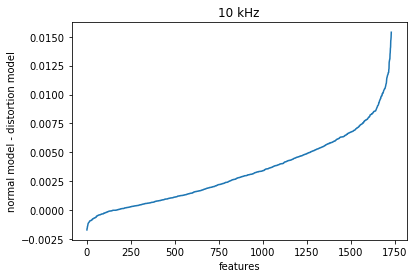

In [10]:
# permutation importance of each feature in 10 kHz model, sorted according influence values.
df_hitmiss = pd.read_csv(os.path.join(exp4_hitmiss, os.listdir(exp4_hitmiss)[0]), dtype=np.float32)
data = sorted(df_hitmiss['meanInfluence'].values)
sns.lineplot(x=range(len(data)), y=data)
plt.title('10 kHz')
plt.ylabel('normal model - distortion model')
plt.xlabel('features')

Text(0.5, 0, 'features')

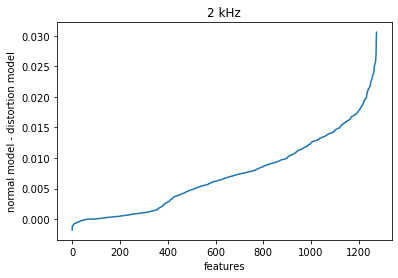

In [11]:
# permutation importance of each feature in 2 kHz model, sorted according influence values.
df_facr = pd.read_csv(os.path.join(exp4_facr, os.listdir(exp4_facr)[0]), dtype=np.float32)
data = sorted(df_facr['meanInfluence'].values)
sns.lineplot(x=range(len(data)), y=data)
plt.title('2 kHz')
plt.ylabel('normal model - distortion model')
plt.xlabel('features')

In [12]:
df_hitmiss_top10 = pd.read_csv(os.path.join(exp4_hitmiss, os.listdir(exp4_hitmiss)[1]))
df_facr_top10 = pd.read_csv(os.path.join(exp4_facr, os.listdir(exp4_facr)[1]))
# the most ten region pairs in 10 kHz model
df_hitmiss_top10

,area1_index,area2_index,area1,area2
0,6,105,Primary somatosensory area mouth,Nucleus of the brachium of the inferior collic...
1,91,119,Periventricular zone,Substantia nigra compact part
2,94,108,Mammillary body,Ventral tegmental area
3,87,106,Intralaminar nuclei of the dorsal thalamus,Nucleus sagulum
4,41,122,Dorsal peduncular area,Nucleus of the lateral lemniscus
5,3,92,Primary somatosensory area nose,Periventricular region
6,14,110,Primary auditory area,Midbrain reticular nucleus
7,13,134,Dorsal auditory area,Peritrigeminal zone
8,12,46,Visceral area,Postpiriform transition area
9,26,119,Prelimbic area,Substantia nigra compact part


In [13]:
# the moset ten region pairs in 2 kHz model.
df_facr_top10

,area1_index,area2_index,area1,area2
0,12,112,Visceral area,Periaqueductal gray
1,6,97,Primary somatosensory area mouth,Ventral premammillary nucleus
2,94,127,Mammillary body,Posterodorsal tegmental nucleus
3,64,71,Basolateral amygdalar nucleus,Lateral septal nucleus
4,13,107,Dorsal auditory area,Substantia nigra reticular part
5,49,51,Field CA3,Fasciola cinerea
6,49,83,Field CA3,Lateral group of the dorsal thalamus
7,14,106,Primary auditory area,Nucleus sagulum
8,85,130,Medial group of the dorsal thalamus,Pontine reticular nucleus caudal part
9,8,32,Primary somatosensory area trunk,Retrosplenial area ventral part
